## metal-nonmetal classifier

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd
import warnings

In [2]:
df = pd.read_csv('_data/aflow_training_set.csv')
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,is_metal,gap_type
0,0.062680,0.075245,0.455628,0.142857,0.819337,0.118012,0.148862,0.512563,0.573389,0.0000,metal,NaN
1,0.056090,0.005885,0.341321,0.142857,0.883628,0.006211,0.132838,0.582915,0.846931,0.4356,insulator,indirect
2,0.084915,0.028068,0.247910,0.142857,0.957887,0.031056,0.220755,0.368090,0.172894,0.0000,metal,NaN
3,0.047233,0.066869,0.392057,0.285714,0.899576,0.130435,0.204915,0.788945,0.625048,0.1958,insulator,direct
4,0.153241,0.176767,0.289526,0.285714,0.780463,0.130435,0.205447,0.572027,0.650591,1.6227,insulator,direct
...,...,...,...,...,...,...,...,...,...,...,...,...
52529,0.046321,0.004964,0.609187,0.142857,0.883628,0.006211,0.108523,0.542714,0.523256,0.0000,metal,NaN
52530,0.051342,0.051422,0.172185,0.142857,0.796162,0.093168,0.175701,0.432161,0.429851,0.0000,metal,NaN
52531,0.068718,0.015282,0.202133,0.285714,0.666085,0.018634,0.177943,0.401173,0.824438,1.9680,insulator,indirect
52532,0.086477,0.008749,0.282762,0.142857,0.883628,0.006211,0.196514,0.395729,0.178040,0.0000,metal,NaN


In [113]:
X = df.drop(['Egap', 'is_metal', 'gap_type'], axis=1)
y = df['is_metal']

le = LabelEncoder()
y = le.fit_transform(y)

In [114]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.1, max_depth = 8, random_state=42)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# saving metal non-metal model
joblib.dump(gbc, 'models/metal_nonmetal_classifier.joblib')

['models/metal_nonmetal_classifier.joblib']

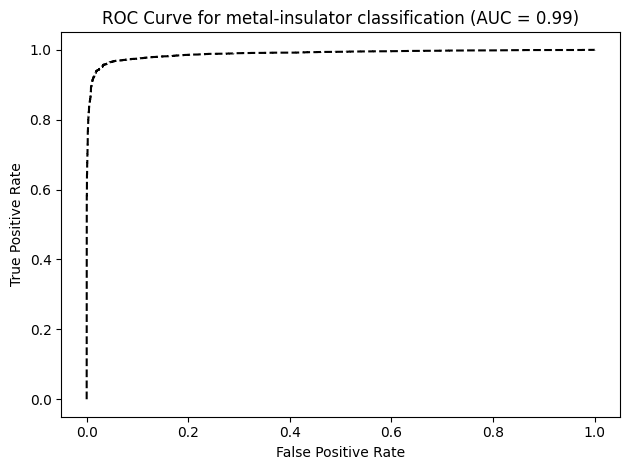

In [115]:
y_prob = gbc.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for metal-insulator classification (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/roc_curve_mnm_classifier.pdf')
plt.show()

In [12]:
# Prediction metric for metal non-metal classifier
print(f'Accuracy: {accuracy:.3f}')
print(f'roc_auc_score: {auc_roc:.3f}')

Accuracy: 0.960
roc_auc_score: 0.989


## gaptype classifier (nonmetals)

In [116]:
df = df.dropna()
X = df.drop(['Egap', 'is_metal', 'gap_type'], axis=1)
y = df['gap_type']

le = LabelEncoder()
y = le.fit_transform(y)

In [117]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

gbc = GradientBoostingClassifier(n_estimators=200, learning_rate = 0.1, max_depth = 10, random_state=42)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# saving gap type model
joblib.dump(gbc, 'models/gaptype_classifier.joblib')

['models/gaptype_classifier.joblib']

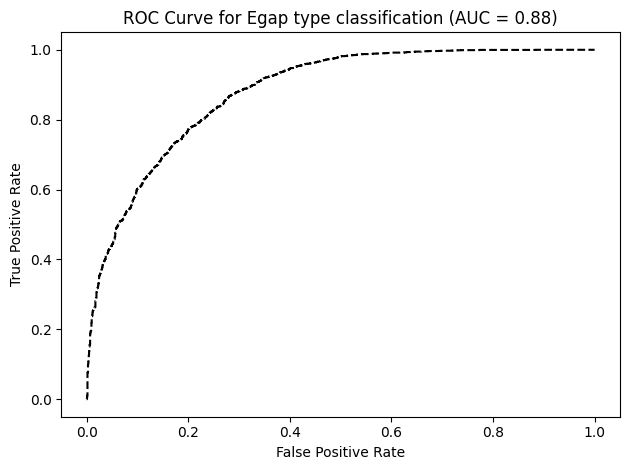

In [118]:
y_prob = gbc.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Egap type classification (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/roc_curve_type.pdf')
plt.show()

In [119]:
# Prediction metric for metal non-metal classifier
print(f'Accuracy: {accuracy:.3f}')
print(f'roc_auc_score: {auc_roc:.3f}')

Accuracy: 0.814
roc_auc_score: 0.879


## bandgap regression model (non-metals)

In [120]:
X = df.drop(['Egap', 'is_metal', 'gap_type'], axis=1)
y = df['Egap']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 0.2, random_state=42)

In [18]:
# training the xgb regressor
best_params = {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000, 'reg_alpha': 0.0, 'reg_lambda': 0.1, 'subsample': 1.0}
xgb = XGBRegressor(objective='reg:squarederror', random_state=0, n_jobs=-1, **best_params)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [19]:
# performance on the test set (xgb regressor)
xgb_test_pred = xgb.predict(X_test)
print("Test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, xgb_test_pred))
print("Mean squared error:", mean_squared_error(y_test, xgb_test_pred))
print("R-squared value:", r2_score(y_test, xgb_test_pred))

Test set performance:
Mean absolute error: 0.4165594802435853
Mean squared error: 0.47886386909394574
R-squared value: 0.8340607225750283


In [20]:
joblib.dump(xgb, 'models/xgb_regressor.joblib')

['models/xgb_regressor.joblib']

In [21]:
# training the gradient boosting regressor
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 1000}
gbr = GradientBoostingRegressor(loss='squared_error', subsample=0.85, random_state=0, **best_params)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features='sqrt', min_samples_split=5,
                          n_estimators=1000, random_state=0, subsample=0.85)

In [22]:
# performance on the test set (gradient boosting regressor)
gbr_test_pred = gbr.predict(X_test)
print("Test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, gbr_test_pred))
print("Mean squared error:", mean_squared_error(y_test, gbr_test_pred))
print("R-squared value:", r2_score(y_test, gbr_test_pred))

Test set performance:
Mean absolute error: 0.39611437208183947
Mean squared error: 0.4639957724149372
R-squared value: 0.8392129200550084


In [23]:
joblib.dump(gbr, 'models/gbr_regressor.joblib')

['models/gbr_regressor.joblib']

In [24]:
best_params = {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
rf = RandomForestRegressor(criterion='squared_error', bootstrap=False, random_state=0, **best_params)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=500, random_state=0)

In [25]:
# performance on the test set (random forest regressor)
rf_test_pred = rf.predict(X_test)
print("Test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, rf_test_pred))
print("Mean squared error:", mean_squared_error(y_test, rf_test_pred))
print("R-squared value:", r2_score(y_test, rf_test_pred))

Test set performance:
Mean absolute error: 0.3722501996003506
Mean squared error: 0.48181608294197814
R-squared value: 0.8330377006592731


In [26]:
joblib.dump(gbr, 'models/rfr_regressor.joblib')

['models/rfr_regressor.joblib']

## ensembling models (non metals)

In [121]:
gbr_model = joblib.load('models/gbr_regressor.joblib')
rfr_model = joblib.load('models/rfr_regressor.joblib')
xgb_model = joblib.load('models/xgb_regressor.joblib')

In [122]:
ridge_learner = RidgeCV()
estimators = [('gbr', gbr_model), ('rfr', rfr_model), ('xgb', xgb_model)]

stack = StackingRegressor(estimators=estimators, final_estimator=ridge_learner)
stack.fit(X_train, y_train)

In [51]:
# performance on the test set (stacking regressor)
y_pred = stack.predict(X_test)

print( "SVR, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

SVR, test set performance:
Mean absolute error: 0.38601390005219727
Mean squared error: 0.4329122434071211
R-squared value: 0.8469520277010236


In [52]:
joblib.dump(stack, 'models/bandgap_stacking_regressor.joblib')

['models/bandgap_stacking_regressor.joblib']

## clustering (non-metals)

In [39]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init='auto')
kmeans.fit(X)

row_indexer = df.index
col_indexer = ['cluster_label']
df.loc[row_indexer, col_indexer] = kmeans.predict(X)

# silhouette score
silhouette_avg = silhouette_score(X, df['cluster_label'])
print(f"Silhouette score: {silhouette_avg}")

/tmp/ipykernel_1560648/3494721955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[row_indexer, col_indexer] = kmeans.predict(X)


Silhouette score: 0.2803293819915398


In [35]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df.loc[row_indexer, col_indexer] = kmeans.predict(X)

In [40]:
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,is_metal,gap_type,cluster_label
1,0.056090,0.005885,0.341321,0.142857,0.883628,0.006211,0.132838,0.582915,0.846931,0.4356,insulator,indirect,0
3,0.047233,0.066869,0.392057,0.285714,0.899576,0.130435,0.204915,0.788945,0.625048,0.1958,insulator,direct,0
4,0.153241,0.176767,0.289526,0.285714,0.780463,0.130435,0.205447,0.572027,0.650591,1.6227,insulator,direct,0
7,0.022006,0.181477,0.121595,0.428571,0.210815,0.590062,0.175221,0.592337,0.258483,3.6554,insulator,indirect,3
13,0.071945,0.109510,0.265282,0.428571,0.461999,0.155280,0.183605,0.708543,0.651544,2.9116,insulator,direct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52526,0.094927,0.041576,0.221106,0.285714,0.880140,0.043478,0.196479,0.492462,0.473885,0.0345,insulator,indirect,0
52527,0.131691,0.020081,0.255542,0.000000,1.000000,0.012422,0.201646,0.527638,0.578917,0.1523,insulator,direct,0
52528,0.150426,0.110219,0.222238,0.285714,0.425866,0.080745,0.197069,0.399497,0.735799,0.9765,insulator,indirect,1
52531,0.068718,0.015282,0.202133,0.285714,0.666085,0.018634,0.177943,0.401173,0.824438,1.9680,insulator,indirect,1


In [41]:
df.to_csv('_data/aflow_training_set_with_cluster_label.csv')

## Cluster classifiers

In [42]:
df = pd.read_csv('_data/aflow_training_set_with_cluster_label.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)
df

,volume_atom,volume_cell,density,nspecies,stoichiometry,natoms,enthalpy_atom,electronegativity,group_numbers,Egap,is_metal,gap_type,cluster_label
0,0.056090,0.005885,0.341321,0.142857,0.883628,0.006211,0.132838,0.582915,0.846931,0.4356,insulator,indirect,0
1,0.047233,0.066869,0.392057,0.285714,0.899576,0.130435,0.204915,0.788945,0.625048,0.1958,insulator,direct,0
2,0.153241,0.176767,0.289526,0.285714,0.780463,0.130435,0.205447,0.572027,0.650591,1.6227,insulator,direct,0
3,0.022006,0.181477,0.121595,0.428571,0.210815,0.590062,0.175221,0.592337,0.258483,3.6554,insulator,indirect,3
4,0.071945,0.109510,0.265282,0.428571,0.461999,0.155280,0.183605,0.708543,0.651544,2.9116,insulator,direct,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25133,0.094927,0.041576,0.221106,0.285714,0.880140,0.043478,0.196479,0.492462,0.473885,0.0345,insulator,indirect,0
25134,0.131691,0.020081,0.255542,0.000000,1.000000,0.012422,0.201646,0.527638,0.578917,0.1523,insulator,direct,0
25135,0.150426,0.110219,0.222238,0.285714,0.425866,0.080745,0.197069,0.399497,0.735799,0.9765,insulator,indirect,1
25136,0.068718,0.015282,0.202133,0.285714,0.666085,0.018634,0.177943,0.401173,0.824438,1.9680,insulator,indirect,1


In [43]:
X = df.drop(['is_metal', 'gap_type', 'Egap', 'cluster_label'], axis=1)
y = df['cluster_label']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 200, max_depth = None, max_features= 'sqrt', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

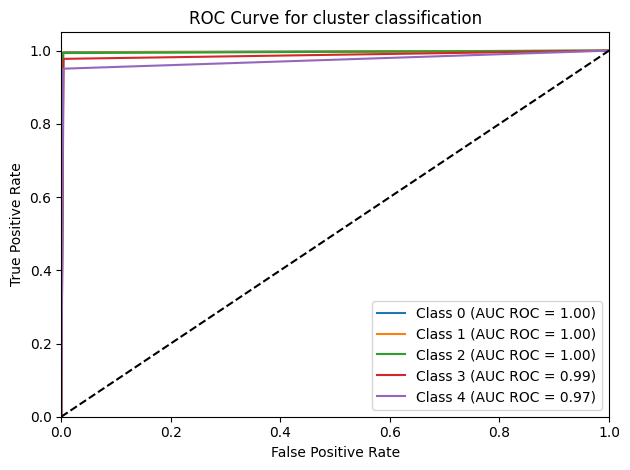

In [44]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = label_binarize(y_pred, classes=np.unique(y_test))
auc_roc = roc_auc_score(y_test_onehot, y_pred_proba, multi_class='ovo')

# Plot the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(len(np.unique(y_test))):
    plt.plot(fpr[i], tpr[i], label='Class %s (AUC ROC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for cluster classification')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('plots/roc_cluster_classification.pdf')
plt.show()

In [45]:
# Prediction metric for cluster classification
print(f'Accuracy: {accuracy:.3f}')
print(f'roc_auc_score: {auc_roc:.3f}')

Accuracy: 0.987
roc_auc_score: 0.990


In [46]:
joblib.dump(rf, 'models/cluster_classification.joblib')

['models/cluster_classification.joblib']

## Cluster 0

In [47]:
# choosing the cluster 0
cluster_label = 0
cluster_data = df[df['cluster_label'] == cluster_label]

X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['gap_type']

le = LabelEncoder()
y = le.fit_transform(y)

In [48]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [49]:
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800, random_state=42)

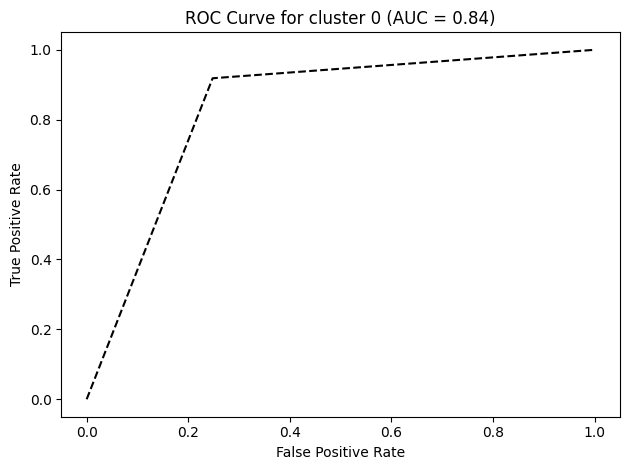

Accuracy: 0.8596491228070176
AUC score: 0.8353090759507871


In [50]:
y_pred = rf.predict(X_test)

# Calculate and print the accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for cluster 0 (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/classifier_0_roc_curve.pdf')
plt.show()


print('Accuracy:', accuracy)
print('AUC score:', roc_auc)

In [51]:
joblib.dump(rf, 'models/classifier_0.joblib')

['models/classifier_0.joblib']

In [52]:
# regression model for Egap prediction
X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['Egap']

In [53]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [54]:
# random forest regressor on cluster 0
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
rfr = RandomForestRegressor(random_state=42, **best_params)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, random_state=42)

In [55]:
y_pred = rfr.predict(X_test)

print( "RFR, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

RFR, test set performance:
Mean absolute error: 0.30045450974266313
Mean squared error: 0.32102689702525106
R-squared value: 0.9094321364240452


In [56]:
joblib.dump(rfr, 'models/regressor_0_1.joblib')

['models/regressor_0_1.joblib']

In [57]:
# xgboost regressor on cluster 0
best_params = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.9}
xgb = XGBRegressor(random_state=42, **best_params)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [58]:
y_pred = xgb.predict(X_test)

print( "XGB, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

XGB, test set performance:
Mean absolute error: 0.2654822364373862
Mean squared error: 0.29167077194942026
R-squared value: 0.917714064061957


In [59]:
joblib.dump(xgb, 'models/regressor_0_2.joblib')

['models/regressor_0_2.joblib']

## cluster 1

In [60]:
# choosing the cluster 1
cluster_label = 1
cluster_data = df[df['cluster_label'] == cluster_label]

X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['gap_type']

le = LabelEncoder()
y = le.fit_transform(y)

In [61]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [62]:
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

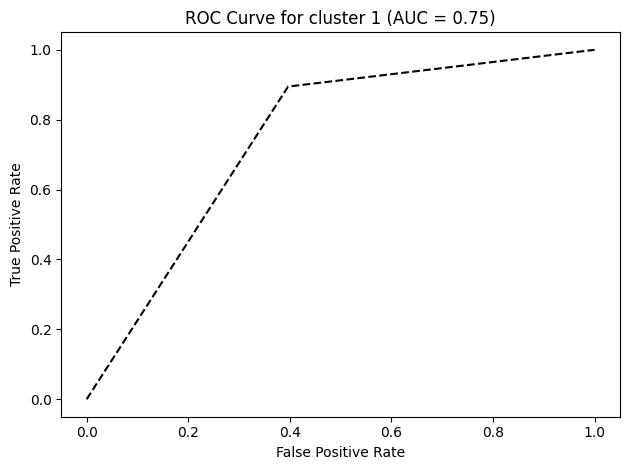

Accuracy: 0.806282722513089
AUC score: 0.7490925589836661


In [63]:
y_pred = rf.predict(X_test)

# Calculate and print the accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for cluster 1 (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/classifier_1_roc_curve.pdf')
plt.show()


print('Accuracy:', accuracy)
print('AUC score:', roc_auc)

In [64]:
joblib.dump(rf, 'models/classifier_1.joblib')

['models/classifier_1.joblib']

In [65]:
# regression model for Egap prediction
X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['Egap']

In [66]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [67]:
# random forest regressor on cluster 1
best_params = {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
rfr = RandomForestRegressor(random_state=42, **best_params)

rfr.fit(X_train, y_train)

/home/sagar/ML-EBGEstimate/sagar-sajag/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', n_estimators=500, random_state=42)

In [68]:
y_pred = rfr.predict(X_test)

print( "RFR, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

RFR, test set performance:
Mean absolute error: 0.4831731319371739
Mean squared error: 0.7138416176634327
R-squared value: 0.7066104398370376


In [69]:
joblib.dump(rfr, 'models/regressor_1_1.joblib')

['models/regressor_1_1.joblib']

In [70]:
# xgboost regressor on cluster 1
best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.9}
xgb = XGBRegressor(random_state=42, **best_params)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [71]:
y_pred = xgb.predict(X_test)

print( "XGB, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

XGB, test set performance:
Mean absolute error: 0.4480175701696835
Mean squared error: 0.6744452705135145
R-squared value: 0.7228023746813178


In [72]:
joblib.dump(xgb, 'models/regressor_1_2.joblib')

['models/regressor_1_2.joblib']

## cluster 2

In [73]:
# choosing the cluster 2
cluster_label = 2
cluster_data = df[df['cluster_label'] == cluster_label]

X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['gap_type']

le = LabelEncoder()
y = le.fit_transform(y)

In [74]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [75]:
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

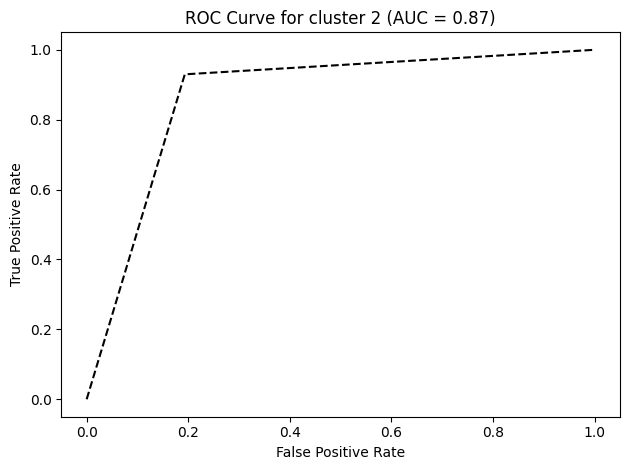

Accuracy: 0.8762376237623762
AUC score: 0.8683213716108453


In [76]:
y_pred = rf.predict(X_test)

# Calculate and print the accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for cluster 2 (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/classifier_2_roc_curve.pdf')
plt.show()


print('Accuracy:', accuracy)
print('AUC score:', roc_auc)

In [77]:
joblib.dump(rf, 'models/classifier_2.joblib')

['models/classifier_2.joblib']

In [78]:
# regression model for Egap prediction
X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['Egap']

In [79]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [80]:
# random forest regressor on cluster 2
best_params = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
rfr = RandomForestRegressor(random_state=42, **best_params)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [81]:
y_pred = rfr.predict(X_test)

print( "RFR, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

RFR, test set performance:
Mean absolute error: 0.2942958786063001
Mean squared error: 0.2686700530256911
R-squared value: 0.8990396091366017


In [82]:
joblib.dump(rfr, 'models/regressor_2_1.joblib')

['models/regressor_2_1.joblib']

In [83]:
# xgboost regressor on cluster 2
best_params = {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9}
xgb = XGBRegressor(random_state=42, **best_params)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [84]:
y_pred = xgb.predict(X_test)

print( "XGB, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

XGB, test set performance:
Mean absolute error: 0.2746637605080805
Mean squared error: 0.25870709325450986
R-squared value: 0.9027834737814588


In [85]:
joblib.dump(xgb, 'models/regressor_2_2.joblib')

['models/regressor_2_2.joblib']

## cluster 3

In [86]:
# choosing the cluster 3
cluster_label = 3
cluster_data = df[df['cluster_label'] == cluster_label]

X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['gap_type']

le = LabelEncoder()
y = le.fit_transform(y)

In [87]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [88]:
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

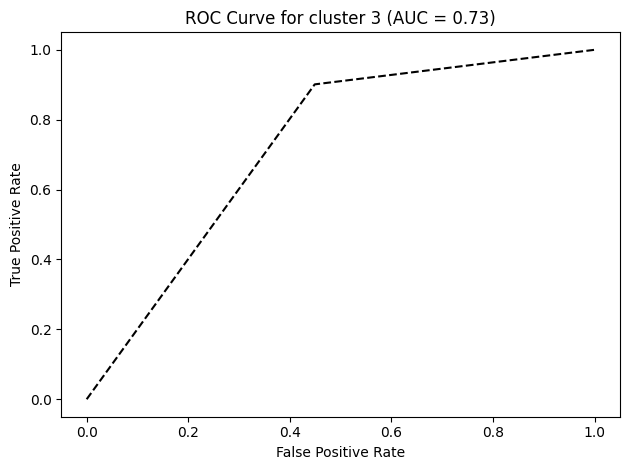

Accuracy: 0.7785714285714286
AUC score: 0.7260596546310831


In [89]:
y_pred = rf.predict(X_test)

# Calculate and print the accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for cluster 3 (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/classifier_3_roc_curve.pdf')
plt.show()


print('Accuracy:', accuracy)
print('AUC score:', roc_auc)

In [90]:
joblib.dump(rf, 'models/classifier_3.joblib')

['models/classifier_3.joblib']

In [91]:
# regression model for Egap prediction
X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['Egap']

In [92]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [93]:
# random forest regressor on cluster 3
best_params = {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
rfr = RandomForestRegressor(random_state=42, **best_params)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=300,
                      random_state=42)

In [94]:
y_pred = rfr.predict(X_test)

print( "RFR, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

RFR, test set performance:
Mean absolute error: 0.538976115953576
Mean squared error: 0.6115530964257173
R-squared value: 0.7823711043091847


In [95]:
joblib.dump(rfr, 'models/regressor_3_1.joblib')

['models/regressor_3_1.joblib']

In [96]:
# xgboost regressor on cluster 3
best_params = {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.9}
xgb = XGBRegressor(random_state=42, **best_params)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [97]:
y_pred = xgb.predict(X_test)

print( "XGB, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

XGB, test set performance:
Mean absolute error: 0.510307842979942
Mean squared error: 0.6024998077068269
R-squared value: 0.7855928314785467


In [98]:
joblib.dump(rfr, 'models/regressor_3_2.joblib')

['models/regressor_3_2.joblib']

## cluster 4

In [99]:
# choosing the cluster 4
cluster_label = 4
cluster_data = df[df['cluster_label'] == cluster_label]

X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['gap_type']

le = LabelEncoder()
y = le.fit_transform(y)

In [100]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [101]:
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800, random_state=42)

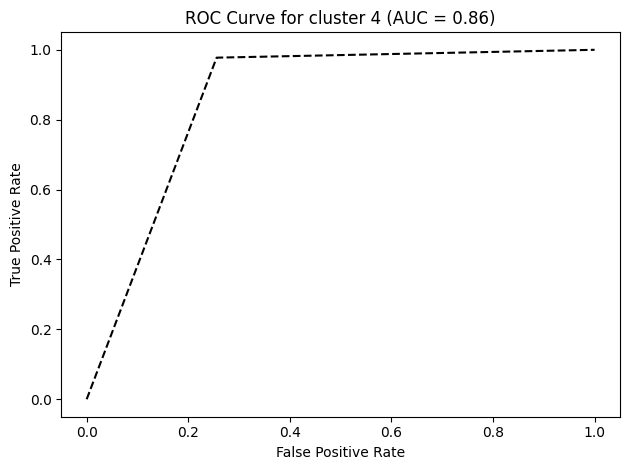

Accuracy: 0.9015151515151515
AUC score: 0.8608570681996341


In [102]:
y_pred = rf.predict(X_test)

# Calculate and print the accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for cluster 4 (AUC = {auc_roc:.2f})')
plt.tight_layout()
plt.savefig('plots/classifier_4_roc_curve.pdf')
plt.show()


print('Accuracy:', accuracy)
print('AUC score:', roc_auc)

In [103]:
joblib.dump(rf, 'models/classifier_4.joblib')

['models/classifier_4.joblib']

In [104]:
# regression model for Egap prediction
X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
y = cluster_data['Egap']

In [105]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.2, random_state=42)

In [106]:
# random forest regressor on cluster 4
best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
rfr = RandomForestRegressor(random_state=42, **best_params)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=42)

In [107]:
y_pred = rfr.predict(X_test)

print( "RFR, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

RFR, test set performance:
Mean absolute error: 0.5364181621335644
Mean squared error: 0.8929464564817451
R-squared value: 0.709564993003588


In [108]:
joblib.dump(rfr, 'models/regressor_4_1.joblib')

['models/regressor_4_1.joblib']

In [109]:
# xgboost regressor on cluster 4
best_params = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9}
xgb = XGBRegressor(random_state=42, **best_params)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [110]:
y_pred = xgb.predict(X_test)

print( "XGB, test set performance:")
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared value:", r2_score(y_test, y_pred))

XGB, test set performance:
Mean absolute error: 0.5086873375638866
Mean squared error: 0.8613944647936849
R-squared value: 0.7198274257173908


In [111]:
joblib.dump(rfr, 'models/regressor_4_2.joblib')

['models/regressor_4_2.joblib']